# Deep Neural Networks

In [ ]:
import tensorflow        as tf
import numpy             as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 
%aimport nn_model
%aimport create_data
%aimport preprocess

## tasks

- Pietro:
    - punto 1

- Giacomo:
    - punto2

- Nicolò:
    - punto 3

- Alberto:
    - punto 4

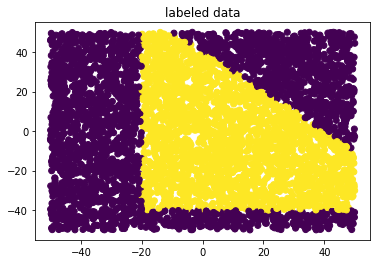

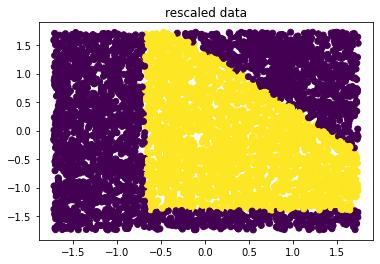

In [ ]:
# number of data
N = 5000
# box size
B = 100

# random seed for reproducibility
np.random.seed(20220307)

x = create_data.sample_data(N, B)
y = create_data.assign_label(x)

plt.scatter(x[:,0], x[:,1], c=y)
plt.title("labeled data")
plt.show()

mean = np.mean(x, axis=0)
std = np.std(x, axis=0)

# re-scaling data 
x_scaled = preprocess.rescale(x, mean, std)

plt.scatter(x_scaled[:,0], x_scaled[:,1], c=y)
plt.title("rescaled data")
plt.show()

In [ ]:
train_frac = 0.7

N_train = int(N*train_frac)

training_data, training_labels = np.copy(x_scaled[0:N_train]), np.copy(y[0:N_train])
test_data,     test_labels     = np.copy(x_scaled[N_train:]),  np.copy(y[N_train:])

print(f"Traing set :\t{training_data.shape[0]}\nTest set  :\t{test_data.shape[0]}")

N_valid = 500

x_train, y_train = np.copy(training_data[N_valid:]),  np.copy(training_labels[N_valid:])
x_valid, y_valid = np.copy(training_data[0:N_valid]), np.copy(training_labels[0:N_valid])

print(f"\nN_train :\t{x_train.shape[0]} \nN_valid :\t{x_valid.shape[0]}")

Traing set :	3500
Test set  :	1500

N_train :	3000 
N_valid :	500


In [ ]:
n_features = x.shape[1]

# NN hyperparameters
architecture      = [n_features, 20, 20, 1]
dropout_arc       = [1]
dropout_rates     = [0.2]
batch_norm_arc    = [2]   
input_dim         = architecture[0]
hidden_activation = "relu"
output_activation = "sigmoid"
name              = "my lovely neural network"

# build the NN model
network = nn_model.NN(
    input_dim         = input_dim,
    architecture      = architecture,
    dropout_layers    = dropout_arc,
    dropout_rates     = dropout_rates,
    batch_norm_layers = batch_norm_arc,
    hidden_activation = hidden_activation,
    output_activation = output_activation,
    nn_name           = name,
)

# print summary
network.summary()

# compile NN with loss, optimizer and metrics
loss      = "binary_crossentropy"
optimizer = "adam"
metrics   = ["accuracy"]

network.compile(
    loss      = loss,
    optimizer = optimizer,
    metrics   = metrics,
)

Model: "my lovely neural network"
____________________________________________________________________________________________________
 Layer (type)                                Output Shape                            Param #        
 input_layer (InputLayer)                    [(None, 2)]                             0              
                                                                                                    
 hidden_0 (Dense)                            (None, 20)                              60             
                                                                                                    
 dropout_0 (Dropout)                         (None, 20)                              0              
                                                                                                    
 batch_norm_1 (BatchNormalization)           (None, 20)                              80             
                                                         

In [ ]:
minibatch = 100
N_epochs  = 300

fit = network.fit(
    x_train, y_train,
    epochs          = N_epochs,
    batch_size      = minibatch,
    validation_data = (x_valid, y_valid),
    verbose         = 0,
)

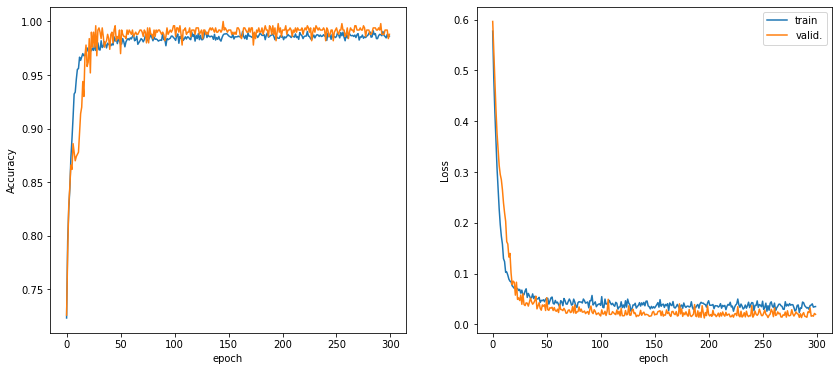

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14,6))

ax[0].plot(fit.history['accuracy'],label="train")
ax[0].plot(fit.history['val_accuracy'],label="valid.")
ax[0].set_xlabel('epoch')
ax[0].set_ylabel("Accuracy")

ax[1].plot(fit.history['loss'],label="train")
ax[1].plot(fit.history['val_loss'],label="valid.")
ax[1].set_xlabel('epoch')
ax[1].set_ylabel("Loss")
ax[1].legend()

plt.show()

In [ ]:
test = network.evaluate(
    test_data, test_labels,
    batch_size      = minibatch,
    verbose         = 0,
)

print("test loss, test acc:", test)

test loss, test acc: [0.017934855073690414, 0.9926666617393494]


In [ ]:
dx = 2
xgrid = np.arange(x.min(),x.max()+dx, dx)
l_grid = xgrid.shape[0]
grid = np.zeros((l_grid*l_grid, 2))

k=0
for i in range(l_grid):
    for j in range(l_grid):
        grid[k,:] = (xgrid[j], xgrid[i])
        k=k+1

In [ ]:
grid_scaled = preprocess.rescale(grid, np.mean(grid, axis=0), np.std(grid, axis=0))
pred        = network.predict(grid_scaled)

# if pred-label > 0.5 ==> pred-label==1
pred_binary = pred.copy()
pred_binary[pred <= 0.5] = 0
pred_binary[pred >  0.5] = 1

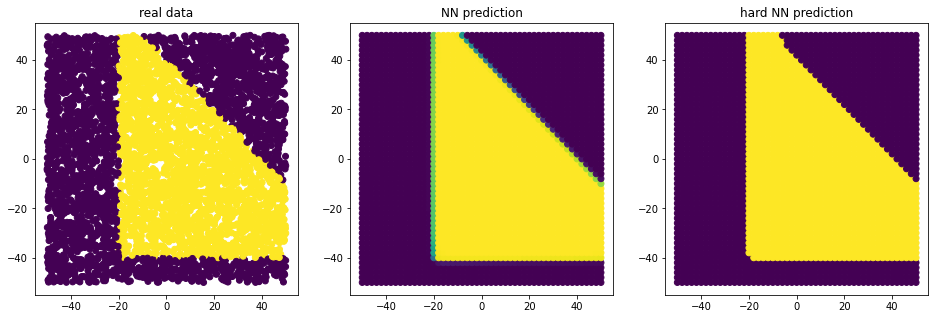

In [ ]:
def boundaries(ax):    
    ax.plot((-20,-20),(-40,50), color="white", lw=2)
    ax.plot((-20,50), (-40,-40),color="white", lw=2)
    ax.plot((-10,50), (50,-10), color="white", lw=2)
    
fig, ax = plt.subplots(nrows=1, ncols=3,figsize=(16,5))

# real data
ax[0].scatter(x[:,0], x[:,1], c=y)
ax[0].set_title("real data")

# NN prediction
ax[1].scatter(grid[:,0], grid[:,1], c=pred)
ax[1].set_title("NN prediction")

# hard NN prediction
ax[2].scatter(grid[:,0], grid[:,1], c=pred_binary)
ax[2].set_title("hard NN prediction")

plt.show()

## 1)  Study the performance of the DNN when the number N of samples is

a) reduced

b) increased

c) augmented

### 1.a


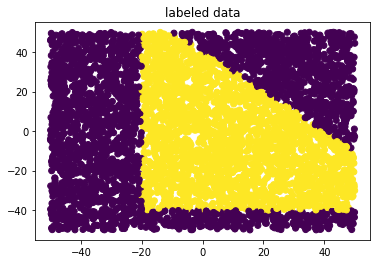

In [ ]:
# number of data
N = 5000
# box size
B = 100

# random seed for reproducibility
np.random.seed(20220307)

x = create_data.sample_data(N, B)
# y = create_data.assign_label(x)

mean = np.mean(x, axis=0)
std = np.std(x, axis=0)

# re-scaling data 
x_scaled = preprocess.rescale(x, mean, std)

In [ ]:
reduction_rates = [0.8, 0.6, 0.4, 0.2] #guarda solo questa cella qua
valid_frac      = [0.7 * rate for rate in reduction_rates]

# reducted_N = [N_train*f for f in reduction_rates]

N = 4000
B = 100

x = create_data.sample_data(N, B)
# y = create_data.assign_label(x)

training_data,   test_data   = [], []
training_labels, test_labels = [], []

for tr_rate, val_rate in zip(reduction_rates, valid_frac):

    N_train = int(N * tr_rate)
    N_valid = int(N * val_rate)

    permutation = np.random.permutation(N_train) # random permutation
    x = x[permutation]

    # qui fai append dei dati
    # NOTA BENE: I DATI sono x[0:N_train]
    training_data.append( np.copy(x[0:N_train]) )
    # per labelare I DATI devi passare alla funzione I DATI 
    training_labels.append( create_data.assign_label(x[0:N_train]) )

    test_data.append( np.copy(x[N_train:]) )
    test_labels.append( create_data.assign_label(x[N_train:]) )

    # training_data[i] = np.copy(x[0:N_train]), 
    # training_labels[i] = create_data.assign_label(X_train)
    # test_data[i] = np.copy(x_scaled[N_train:])
    # test_labels[i] = np.copy(y[N_train:])
  
    x_valid = np.copy(training_data[0:N_valid])
    y_valid = np.copy(training_labels[0:N_valid])



/shared-libs/python3.7/py-core/lib/python3.7/site-packages/numpy/lib/function_base.py:804: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, order=order, subok=subok, copy=True)


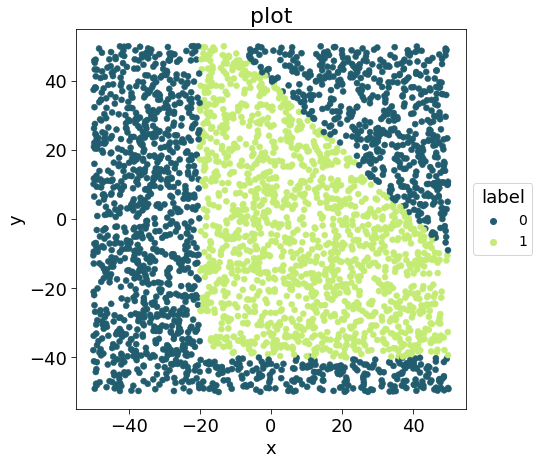

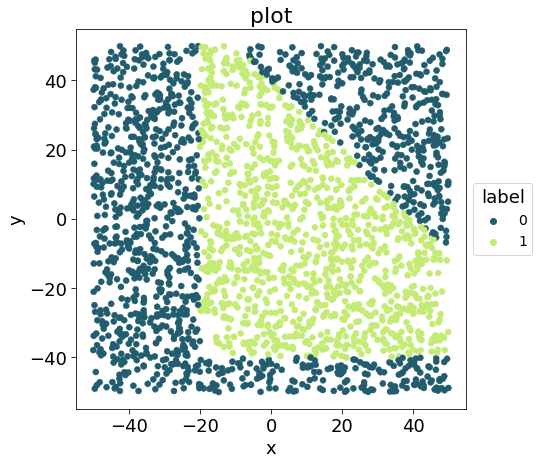

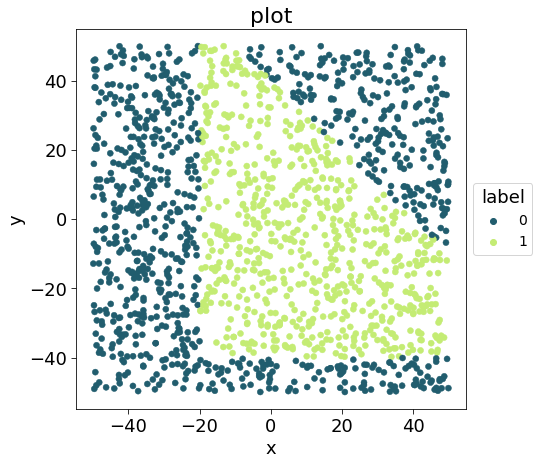

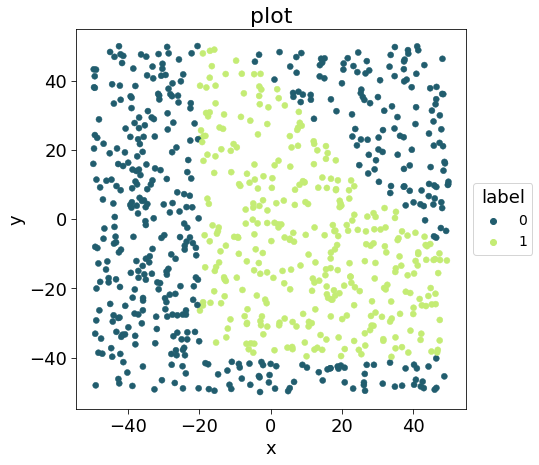

In [ ]:
from plot_utils import plot_labeled_data

for data, labels, rate in zip(training_data, training_labels, reduction_rates):
    fig = plt.figure(figsize=(7,7))
    ax = plot_labeled_data(data, labels, fig)
   #  ax.tilet 
    plt.show()





<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=452e6836-b7b8-455e-80d9-d4109b6baddf' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>